# PCA para dos componentes
<hr>

In [1]:
import pandas as pd

In [2]:
X = pd.read_csv("../Datos tratados/Bits_huella.csv")

In [3]:
y = pd.read_csv("../Datos tratados/BBB.csv")

In [4]:
df = pd.read_csv("../Datos tratados/Datos_con_ECFP.csv")

In [5]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [7]:
pca.fit(X)

PCA(n_components=2)

In [8]:
data = pca.transform(X)

In [10]:
import matplotlib.pyplot as plt

In [11]:
def color(bbb):
    if bbb == "BBB-":
        return "#E03611"
    else:
        return "#11B7E0"

In [12]:
df["color"] = df["BBB+/BBB-"].apply(color)

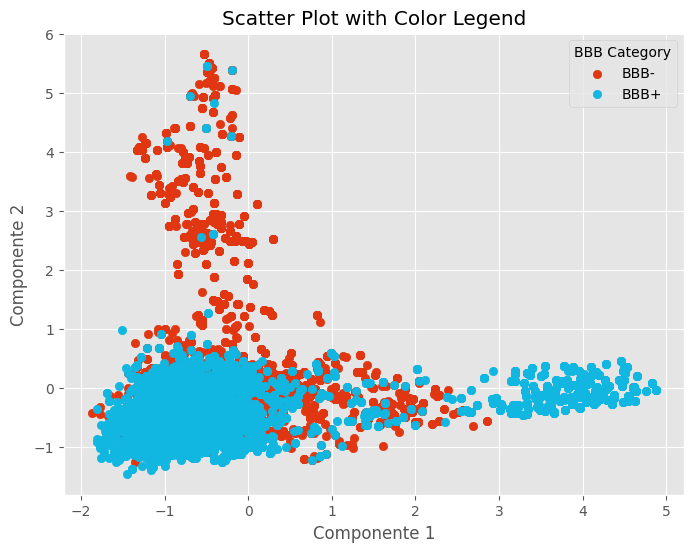

In [14]:
# Crear el gráfico
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))

# Dibujar puntos para cada categoría
for label, color in [("BBB-", "#E03611"), ("BBB+", "#11B7E0")]:
    subset = df[df["BBB+/BBB-"] == label]
    plt.scatter(data[subset.index, 0], data[subset.index, 1], c=color, label=label)

# Añadir etiquetas y leyenda
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)
plt.legend(title='BBB Category')  # Añadir leyenda con el título 'BBB Category'
plt.title('Scatter Plot with Color Legend')
plt.show()

In [16]:
pca.explained_variance_

array([2.18256652, 1.36431485])

In [19]:
import numpy as np

# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Varianza acumulada
cumulative_variance = np.cumsum(explained_variance)


In [21]:
cumulative_variance

array([0.05642877, 0.0917022 ])

# PCA para alcanzar el 80% de la varianza
<hr>

In [23]:
model = PCA(0.8)

In [24]:
model.fit(X)

PCA(n_components=0.8)

In [27]:
import numpy as np

# Varianza explicada por cada componente
explained_variance = model.explained_variance_ratio_

# Varianza acumulada
cumulative_variance = np.cumsum(explained_variance)


In [28]:
cumulative_variance

array([0.05642877, 0.0917022 , 0.11654134, 0.13852978, 0.15804197,
       0.17440297, 0.18972248, 0.20287488, 0.21515547, 0.22715071,
       0.23874103, 0.24974001, 0.26060123, 0.26965372, 0.27846674,
       0.28712126, 0.29562387, 0.30365463, 0.31158902, 0.31895682,
       0.3261616 , 0.33328458, 0.34018844, 0.34681769, 0.3531042 ,
       0.35925966, 0.36518196, 0.37095905, 0.37650572, 0.38188237,
       0.38719465, 0.39238169, 0.3973388 , 0.40222561, 0.40697981,
       0.41171548, 0.41636607, 0.42091699, 0.4252604 , 0.4295843 ,
       0.43382908, 0.43793796, 0.44200833, 0.44601209, 0.44984131,
       0.45359756, 0.45728329, 0.46091741, 0.46446915, 0.4679298 ,
       0.47132156, 0.47469128, 0.47804282, 0.4812991 , 0.48448797,
       0.48761003, 0.49068125, 0.49369623, 0.49666597, 0.49961231,
       0.50251908, 0.50540019, 0.5082512 , 0.51108648, 0.51390189,
       0.51667723, 0.51939314, 0.52205882, 0.52467321, 0.52725717,
       0.52980998, 0.53235794, 0.53488976, 0.53736435, 0.53980

In [29]:
model.n_components_

314